# Import the necessary Libraries

In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

2022-02-19 13:19:57.805288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-19 13:19:57.805313: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Image Size and Images path for training

In [2]:
# re-size all the images to this
IMAGE_SIZE = [200, 200]

train_path = '/home/vimalkumar/Documents/cool drinks'
folders = glob('/home/vimalkumar/Documents/cool drinks/*')

print(len(folders))

5


# Using VGG16 model for training

In [3]:
vgg16_model = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


2022-02-19 13:20:04.149210: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-19 13:20:04.149238: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-19 13:20:04.149252: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (IG154): /proc/driver/nvidia/version does not exist
2022-02-19 13:20:04.149424: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Not training the model with existing weights

In [4]:
# don't train existing weights
for layer in vgg16_model.layers:
    layer.trainable = False

# Flattening is done for converting multi-dimensional array into one dimensional array

In [5]:
x = Flatten()(vgg16_model.output)


# Activation function softmax is used because this model contains more than 2 classes i.e (5 classes)

In [6]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16_model.input, outputs=prediction)

In [7]:

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Image Augmentation is done for training Images

In [8]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                  validation_split=0.2)



# Splitting the model for training and testing

In [9]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (200, 200),
                                                 batch_size = 16,
                                                 class_mode = 'categorical',
                                                subset = 'training',
                                                 shuffle=True)

test_set = train_datagen.flow_from_directory(train_path,
                                            target_size = (200, 200),
                                            batch_size = 16,
                                            class_mode = 'categorical',
                                           subset = 'validation')

Found 3386 images belonging to 5 classes.
Found 844 images belonging to 5 classes.


# Building the VGG16 Model

In [10]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/PIL/Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2022-02-19 13:20:07.426896: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


212/212 [==============================] - 559s 3s/step - loss: 0.2684 - accuracy: 0.9170 - val_loss: 0.1756 - val_accuracy: 0.9431


# Training Accuracy = 91.70%
# Testing Accuracy = 94.31%

# Saving the model

In [11]:
model.save('cooldrinks_model.h5')

In [12]:
import os
import keras
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd

In [13]:
model = keras.models.load_model('cooldrinks_model.h5')

In [14]:
training_set.class_indices

{'Fanta': 0, 'Mazza': 1, 'Sprite': 2, 'coke': 3, 'pepsi': 4}

In [15]:
keys = []
values = []
for key in range(len(folders)):
    #print(key)
    keys.append(key)
for path in os.listdir(train_path):
    #print(path)
    values.append(path)
dic = dict(list(zip(keys,sorted(values))))
print(dic)

{0: 'Fanta', 1: 'Mazza', 2: 'Sprite', 3: 'coke', 4: 'pepsi'}


In [16]:
#path = '/home/vimalkumar/Downloads/bad quality/1424.jpeg'

def predict_image(path):
    img = image.load_img(path, 
                         target_size=(200,200))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = x/255
    x = np.expand_dims(x,axis=0)
    images = np.vstack([x])
    val = model.predict(images)
    print(val)

    a=np.argmax(val,axis=1)
    print(a)
    print(dic[a[0]])

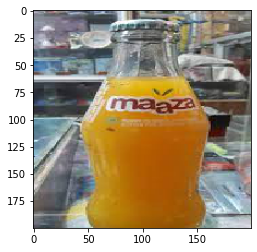

[[0.12655716 0.41559038 0.01807006 0.1010427  0.33873966]]
[1]
Mazza


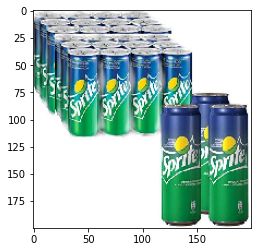

[[0.22031252 0.09599317 0.67492676 0.00224793 0.00651961]]
[2]
Sprite


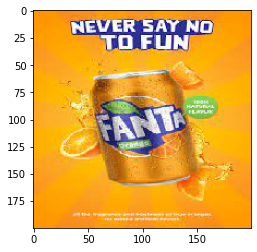

[[9.9702746e-01 1.6508120e-03 6.9368471e-05 1.8321846e-04 1.0691071e-03]]
[0]
Fanta


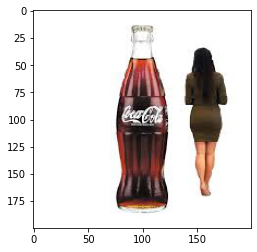

[[7.5423095e-04 1.2927912e-03 1.9286989e-04 9.9598807e-01 1.7721022e-03]]
[3]
coke


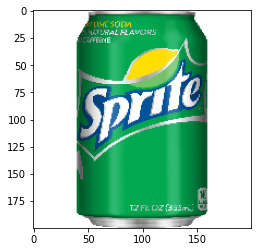

[[2.4232015e-03 2.8163844e-04 9.9701971e-01 3.3193584e-05 2.4226896e-04]]
[2]
Sprite


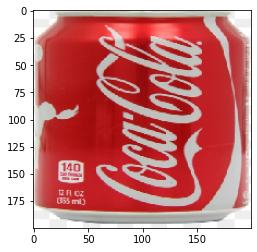

[[0.01263842 0.8774495  0.00231286 0.10561661 0.00198262]]
[1]
Mazza


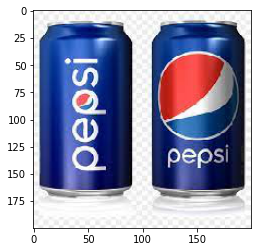

[[1.0926052e-05 3.2258794e-02 2.8459111e-03 4.1209604e-04 9.6447235e-01]]
[4]
pepsi


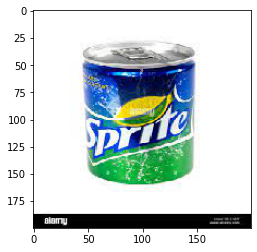

[[0.02706434 0.00575754 0.93067724 0.0182378  0.01826312]]
[2]
Sprite


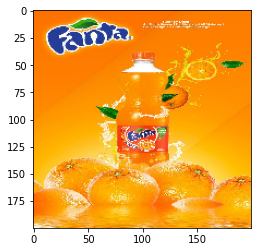

[[9.8936695e-01 1.0517252e-02 4.6792044e-05 1.5209474e-05 5.3761349e-05]]
[0]
Fanta


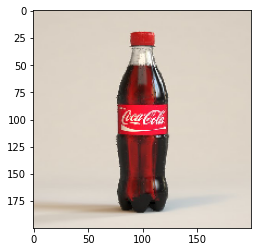

[[0.00329537 0.00189182 0.0125173  0.91265684 0.06963863]]
[3]
coke


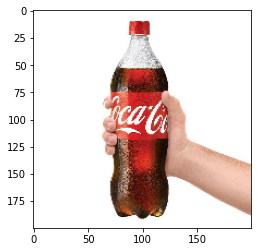

[[0.24432456 0.13859554 0.04529088 0.4282288  0.14356026]]
[3]
coke


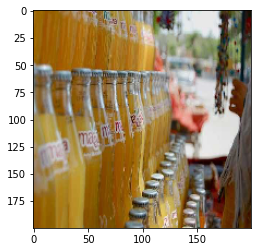

[[7.8840610e-03 9.8771322e-01 7.6274201e-04 5.2169332e-04 3.1181872e-03]]
[1]
Mazza


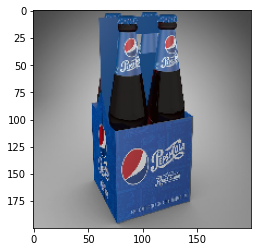

[[1.4981034e-02 1.2558967e-02 6.6117296e-04 2.3382299e-03 9.6946061e-01]]
[4]
pepsi


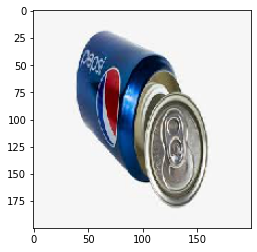

[[0.1808247  0.00997537 0.00540584 0.21813948 0.58565456]]
[4]
pepsi


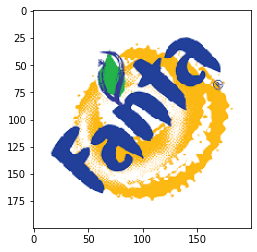

[[9.9959618e-01 6.3011030e-05 2.0015967e-04 8.3897772e-05 5.6688656e-05]]
[0]
Fanta


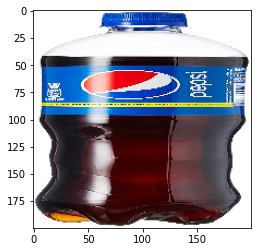

[[3.5839640e-02 1.8807048e-03 5.4834768e-02 4.3023430e-04 9.0701473e-01]]
[4]
pepsi


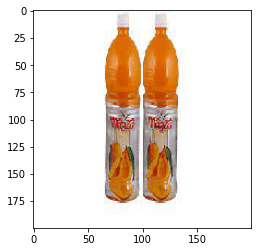

[[7.7494408e-04 9.9615747e-01 5.1811873e-04 2.0213341e-03 5.2808883e-04]]
[1]
Mazza


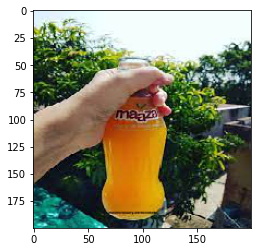

[[0.96332556 0.02367405 0.00163083 0.00159082 0.00977873]]
[0]
Fanta


In [17]:
file_path = '/home/vimalkumar/Documents/cooldrinks_test'

for imm in os.listdir(file_path):
    path = os.path.join(file_path,imm)
    
    predict_image(path)